# Import

In [1]:
from gemseo_oad_training.models import aerodynamic
from gemseo_oad_training.models import approach
from gemseo_oad_training.models import battery
from gemseo_oad_training.models import climb
from gemseo_oad_training.models import engine
from gemseo_oad_training.models import fuel_tank
from gemseo_oad_training.models import geometry
from gemseo_oad_training.models import mass
from gemseo_oad_training.models import mission
from gemseo_oad_training.models import operating_cost
from gemseo_oad_training.models import take_off
from gemseo_oad_training.models import total_mass

from gemseo import configure_logger
from gemseo.disciplines.auto_py import AutoPyDiscipline

from gemseo.algos.design_space import DesignSpace
from gemseo_oad_training.unit import convert_from

from gemseo.scenarios.mdo_scenario import MDOScenario

from gemseo import from_pickle
from gemseo import import_discipline


configure_logger()

<RootLogger root (INFO)>

# Instaciate disciplines

In [2]:
disciplines = [AutoPyDiscipline(aerodynamic), AutoPyDiscipline(approach), AutoPyDiscipline(battery), AutoPyDiscipline(climb), AutoPyDiscipline(engine), AutoPyDiscipline(fuel_tank), AutoPyDiscipline(geometry), AutoPyDiscipline(mass), AutoPyDiscipline(mission), AutoPyDiscipline(operating_cost), AutoPyDiscipline(take_off), AutoPyDiscipline(total_mass)]

# from lh2pac.utils import update_default_inputs
# update_default_inputs(disciplines, {})

# Create design space for the original disciplines

In [3]:
design_space = DesignSpace()
design_space.add_variable('slst', lower_bound=100000.0, upper_bound=200000.0, value=150000.0)
design_space.add_variable('n_pax', lower_bound=120, upper_bound=180, value=150)
design_space.add_variable('area', lower_bound=100, upper_bound=200, value=180)
design_space.add_variable('ar', lower_bound=5, upper_bound=20, value=9)

# Add constraints

In [4]:
scenario = MDOScenario(disciplines=disciplines, design_space=design_space, objective_name= "mtom",formulation_name='MDF')
scenario.add_constraint('tofl', constraint_type='ineq', value=1900.0, positive=False)
scenario.add_constraint('vapp', constraint_type='ineq', value=convert_from("kt",135.0), positive=False)
scenario.add_constraint('vz', constraint_type='ineq', value=convert_from("ft/min",300.0), positive=True)
scenario.add_constraint('span', constraint_type='ineq', value=40.0, positive=False)
scenario.add_constraint('length', constraint_type='ineq', value=45.0, positive=False)
scenario.add_constraint('fm', constraint_type='ineq', value=0.0, positive=True)

test avec les valeurs initiales
faire un tableau feasabilité masse,     3 colonnes x0, et les deux x*

# Execute scenario

In [5]:
scenario.execute(algo_name="NLOPT_COBYLA", max_iter=100)

    INFO - 15:41:00: *** Start MDOScenario execution ***
    INFO - 15:41:00: MDOScenario
    INFO - 15:41:00:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 15:41:00:    MDO formulation: MDF
    INFO - 15:41:00: Optimization problem:
    INFO - 15:41:00:    minimize mtom(slst, n_pax, area, ar)
    INFO - 15:41:00:    with respect to ar, area, n_pax, slst
    INFO - 15:41:00:    subject to constraints:
    INFO - 15:41:00:       tofl(slst, n_pax, area, ar) <= 1900.0
    INFO - 15:41:00:       vapp(slst, n_pax, area, ar) <= 69.44999999400001
    INFO - 15:41:00:       vz(slst, n_pax, area, ar) >= 1.524
    INFO - 15:41:00:       span(slst, n_pax, area, ar) <= 40.0
    INFO - 15:41:00:       length(slst, n_pax, area, ar) <= 45.0
    INFO - 15:41:00:       fm(slst, n_pax, area, ar) >= 0.0
    INFO - 15:41:00:    over the design space:
    INFO - 15:41:00:       +-------+-------------+--------+--------

## Post process

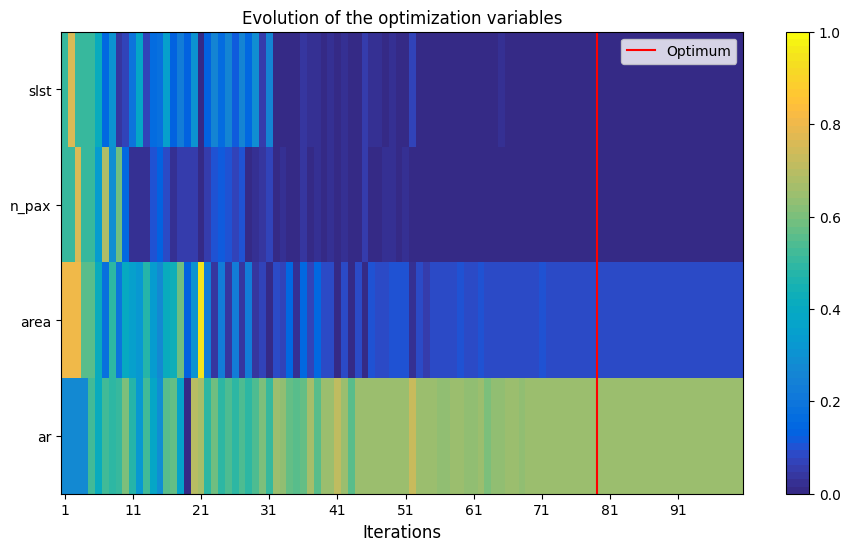

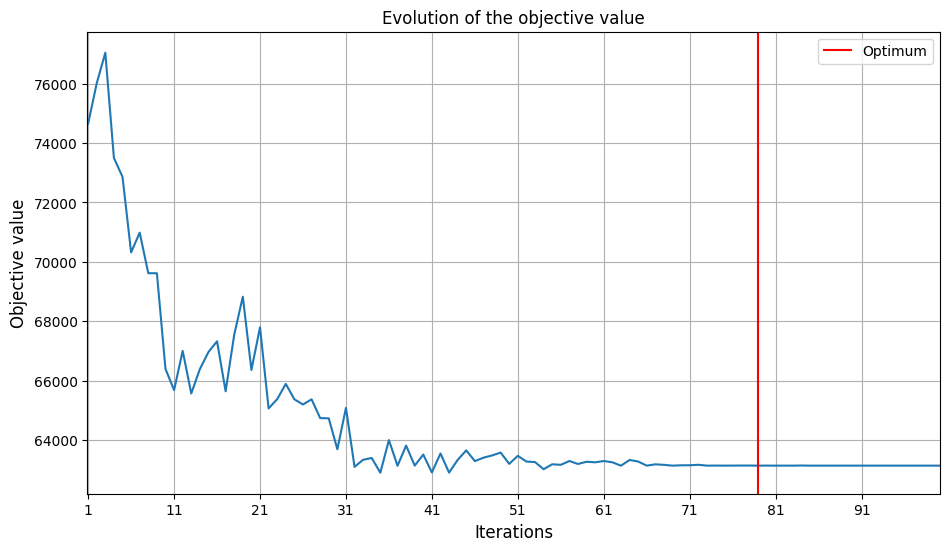

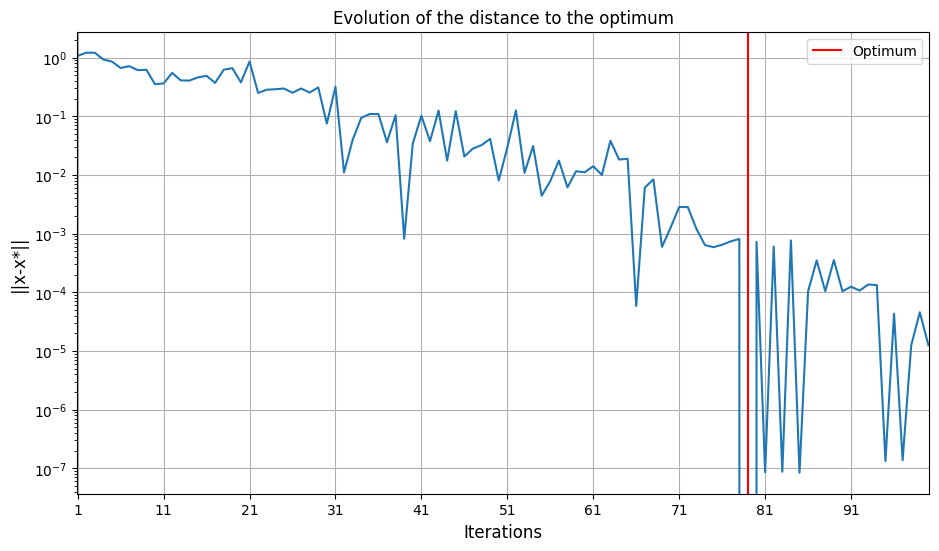

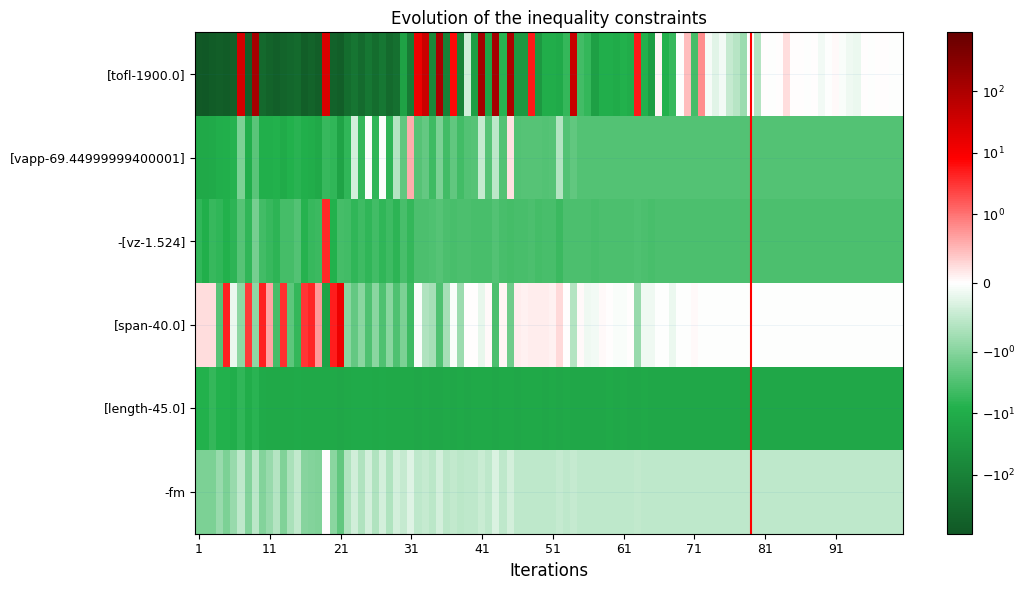

In [6]:
scenario.post_process(post_name="OptHistoryView", save=False, show=True)

# Import surrogate

In [23]:
surrogate_disciplines = import_discipline("UC1_my_surrogate_1.pkl")

# Create another design space for surrogate

In [24]:
design_space_surrogate = DesignSpace()
design_space_surrogate.add_variable('slst', lower_bound=100000.0, upper_bound=200000.0, value=150000.0)
design_space_surrogate.add_variable('n_pax', lower_bound=120, upper_bound=180, value=150)
design_space_surrogate.add_variable('area', lower_bound=100, upper_bound=200, value=180)
design_space_surrogate.add_variable('ar', lower_bound=5, upper_bound=20, value=9)

# Create scenario from surrogate disciplines

In [25]:
scenario_surrogate = MDOScenario(disciplines=[surrogate_disciplines], design_space=design_space_surrogate, objective_name= "mtom",formulation_name='MDF')
# scenario_surr = create_scenario(surrogate_discipline, design_space=design_space_surrogate, objective_name= "mtom",formulation_name='MDF')
scenario_surrogate.add_constraint('tofl', constraint_type='ineq', value=1900.0, positive=False)
scenario_surrogate.add_constraint('vapp', constraint_type='ineq', value=convert_from("kt",135.0), positive=False)
scenario_surrogate.add_constraint('vz', constraint_type='ineq', value=convert_from("ft/min",300.0), positive=True)
scenario_surrogate.add_constraint('span', constraint_type='ineq', value=40.0, positive=False)
scenario_surrogate.add_constraint('length', constraint_type='ineq', value=45.0, positive=False)
scenario_surrogate.add_constraint('fm', constraint_type='ineq', value=0.0, positive=True)

 WARNING - 15:50:18: No coupling in MDA, switching chain_linearize to True.


# Execute surrogate scenario

In [26]:
scenario_surrogate.execute(algo_name="NLOPT_COBYLA", max_iter=300)

    INFO - 15:50:20: *** Start MDOScenario execution ***
    INFO - 15:50:20: MDOScenario
    INFO - 15:50:20:    Disciplines: RBF_Sampling
    INFO - 15:50:20:    MDO formulation: MDF
    INFO - 15:50:20: Optimization problem:
    INFO - 15:50:20:    minimize mtom(slst, n_pax, area, ar)
    INFO - 15:50:20:    with respect to ar, area, n_pax, slst
    INFO - 15:50:20:    subject to constraints:
    INFO - 15:50:20:       tofl(slst, n_pax, area, ar) <= 1900.0
    INFO - 15:50:20:       vapp(slst, n_pax, area, ar) <= 69.44999999400001
    INFO - 15:50:20:       vz(slst, n_pax, area, ar) >= 1.524
    INFO - 15:50:20:       span(slst, n_pax, area, ar) <= 40.0
    INFO - 15:50:20:       length(slst, n_pax, area, ar) <= 45.0
    INFO - 15:50:20:       fm(slst, n_pax, area, ar) >= 0.0
    INFO - 15:50:20:    over the design space:
    INFO - 15:50:20:       +-------+-------------+--------+-------------+-------+
    INFO - 15:50:20:       | Name  | Lower bound | Value  | Upper bound | Type  |

## Post process

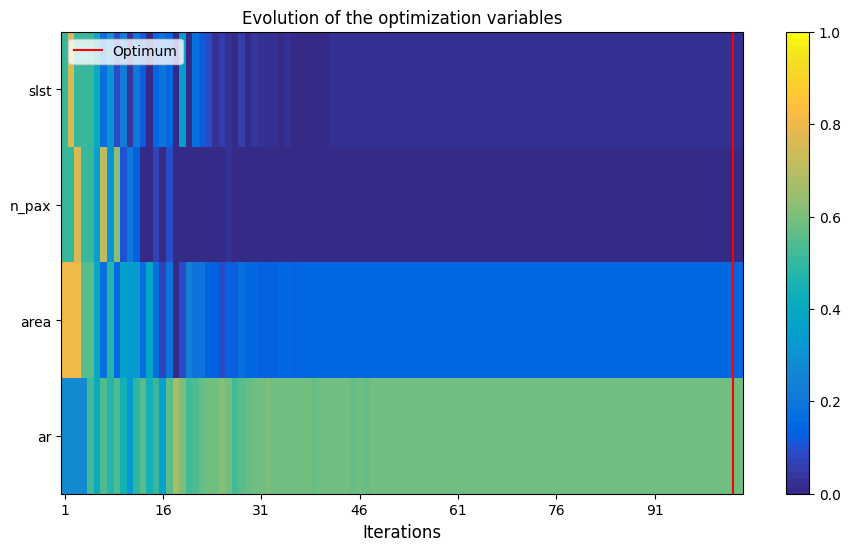

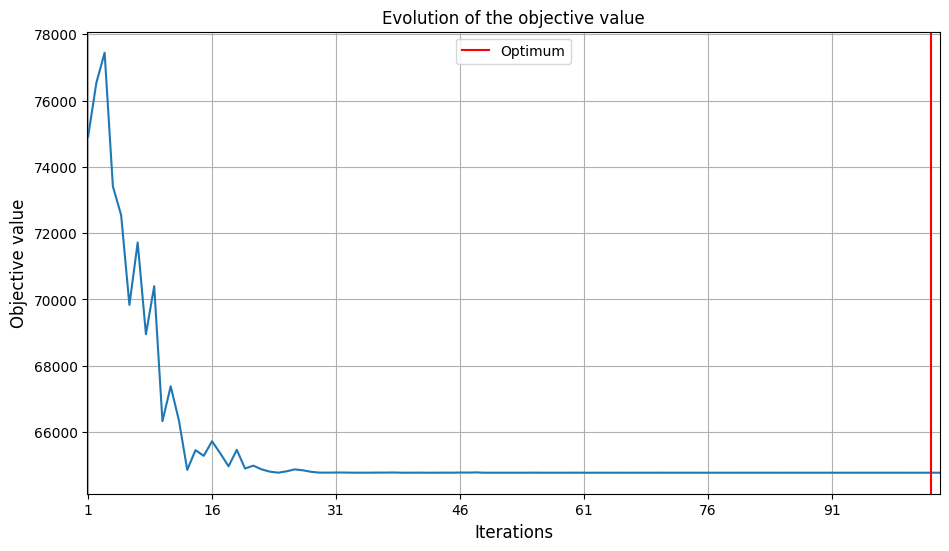

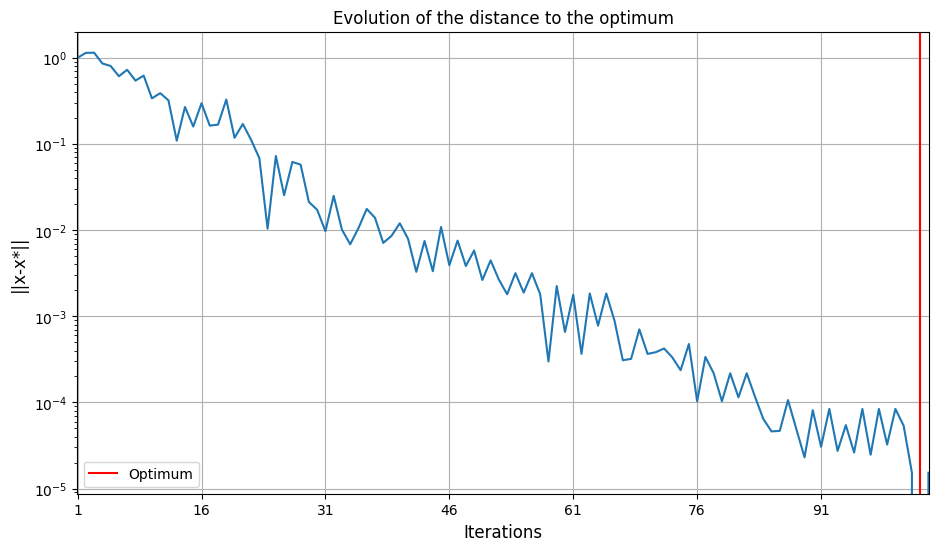

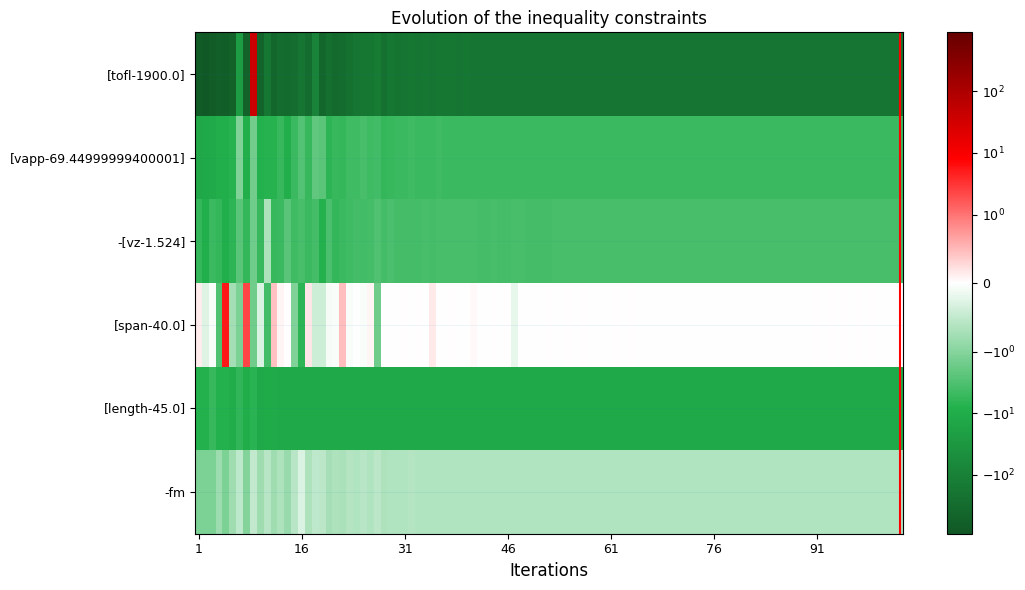

In [27]:
scenario_surrogate.post_process(post_name="OptHistoryView", save=False, show=True)

# Evaluate surrogate optimum in the original model

## Compare results

In [28]:
scenario.optimization_result

Optimization result:
   Design variables: [1.00000000e+05 1.20000000e+02 1.09204574e+02 1.46513983e+01]
   Objective function: 63138.08988269419
   Feasible solution: True

In [29]:
scenario_surrogate.optimization_result.x_opt_as_dict

{'slst': array([101870.41502677]),
 'n_pax': array([120.]),
 'area': array([114.5555049]),
 'ar': array([13.73377554])}

## Evaluate optimum

In [30]:
design_space_test = DesignSpace()
design_space_test.add_variable('slst', lower_bound=100000.0, upper_bound=200000.0, value=150000.0)
design_space_test.add_variable('n_pax', lower_bound=120, upper_bound=180, value=150)
design_space_test.add_variable('area', lower_bound=100, upper_bound=200, value=180)
design_space_test.add_variable('ar', lower_bound=5, upper_bound=20, value=9)

In [31]:
scenario_test = MDOScenario(disciplines=disciplines, design_space=design_space_test, objective_name= "mtom",formulation_name='MDF')
scenario_test.add_constraint('tofl', constraint_type='ineq', value=1900.0, positive=False)
scenario_test.add_constraint('vapp', constraint_type='ineq', value=convert_from("kt",135.0), positive=False)
scenario_test.add_constraint('vz', constraint_type='ineq', value=convert_from("ft/min",300.0), positive=True)
scenario_test.add_constraint('span', constraint_type='ineq', value=40.0, positive=False)
scenario_test.add_constraint('length', constraint_type='ineq', value=45.0, positive=False)
scenario_test.add_constraint('fm', constraint_type='ineq', value=0.0, positive=True)

In [32]:
scenario_surrogate.optimization_result.x_opt_as_dict

{'slst': array([101870.41502677]),
 'n_pax': array([120.]),
 'area': array([114.5555049]),
 'ar': array([13.73377554])}

In [33]:
scenario_test.execute(algo_name = 'CustomDOE', samples = [scenario_surrogate.optimization_result.x_opt_as_dict])

    INFO - 15:50:32: *** Start MDOScenario execution ***
    INFO - 15:50:32: MDOScenario
    INFO - 15:50:32:    Disciplines: aerodynamic approach battery climb engine fuel_tank geometry mass mission operating_cost take_off total_mass
    INFO - 15:50:32:    MDO formulation: MDF
    INFO - 15:50:32: Optimization problem:
    INFO - 15:50:32:    minimize mtom(slst, n_pax, area, ar)
    INFO - 15:50:32:    with respect to ar, area, n_pax, slst
    INFO - 15:50:32:    subject to constraints:
    INFO - 15:50:32:       tofl(slst, n_pax, area, ar) <= 1900.0
    INFO - 15:50:32:       vapp(slst, n_pax, area, ar) <= 69.44999999400001
    INFO - 15:50:32:       vz(slst, n_pax, area, ar) >= 1.524
    INFO - 15:50:32:       span(slst, n_pax, area, ar) <= 40.0
    INFO - 15:50:32:       length(slst, n_pax, area, ar) <= 45.0
    INFO - 15:50:32:       fm(slst, n_pax, area, ar) >= 0.0
    INFO - 15:50:32:    over the design space:
    INFO - 15:50:32:       +-------+-------------+--------+--------